In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pathlib
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.modelbuilder.supervised import SupervisedDataLoader
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

22-Oct-19 07:50:58 - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.
22-Oct-19 07:50:59 - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
sns.set()

In [4]:
def set_options():
    np.set_printoptions(precision=4)
    pd.set_option('display.width', 200)
    pd.set_option('precision', 4)
    pd.set_option('display.width', 500)
    pd.set_option('display.max_columns', 100)
    pd.set_option('display.notebook_repr_html', True)
    pd.options.display.float_format = '{:,.4f}'.format    

In [5]:
set_options()

In [6]:
import logging
logger = logging.getLogger()
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')
logger.setLevel(logging.ERROR)

In [8]:
DATA_DIRECTORY='HRAnalytics'
TRAIN_FILE  = "train.csv"
TEST_FILE  = "test.csv"
PROFILE_REPORT = '_'.join([DATA_DIRECTORY,'profile_report.html'])
RESPONSE = "is_promoted"

In [9]:
load_app_config()
input_path = get_datafolder_path()

filepath  = pathlib.Path(input_path).joinpath(DATA_DIRECTORY)
train_filepath = filepath.joinpath(TRAIN_FILE)
test_filepath = filepath.joinpath(TEST_FILE)


In [10]:
def data_retrieval(train_filepath,test_filepath,response= RESPONSE):
    supervisedloader = SupervisedDataLoader(train_file=train_filepath,test_file=test_filepath,response =RESPONSE) 
    train_dataset,test_dataset = supervisedloader.load()
    return train_dataset,test_dataset

In [11]:
train_dataset,test_dataset =data_retrieval(train_filepath,test_filepath,RESPONSE)

#### EDA HR Analytics

In [12]:
row_count,column_count = train_dataset.shape 

In [13]:
train_dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [14]:
def df_describe(dataframe):
    describe_df = dataframe.describe(include='all').T
    describe_df['is_null'] = train_dataset.isnull().sum()
    describe_df['data_types'] =  train_dataset.dtypes
    return describe_df

In [15]:
df_describe(train_dataset)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,is_null,data_types
employee_id,"54,808.0000",NaN,NaN,NaN,"39,195.8306","22,586.5814",1.0000,"19,669.7500","39,225.5000","58,730.5000","78,298.0000",0,int64
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2409,object
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,object
no_of_trainings,"54,808.0000",NaN,NaN,NaN,1.2530,0.6093,1.0000,1.0000,1.0000,1.0000,10.0000,0,int64
age,"54,808.0000",NaN,NaN,NaN,34.8039,7.6602,20.0000,29.0000,33.0000,39.0000,60.0000,0,int64
previous_year_rating,"50,684.0000",NaN,NaN,NaN,3.3293,1.2600,1.0000,3.0000,3.0000,4.0000,5.0000,4124,float64
length_of_service,"54,808.0000",NaN,NaN,NaN,5.8655,4.2651,1.0000,3.0000,5.0000,7.0000,37.0000,0,int64


In [16]:
pfreport=pandas_profiling.ProfileReport(train_dataset)
pfreport.to_file(PROFILE_REPORT)

#### Whats the distribution of response ?

In [19]:
train_dataset[RESPONSE].value_counts(normalize =True)

0   0.9148
1   0.0852
Name: is_promoted, dtype: float64

In [26]:
groupby_dept_ispromoted = train_dataset.groupby(['department',RESPONSE])[RESPONSE].agg({'reponse_count': 'count'}) 
dept_ispromoted_percent = groupby_dept_ispromoted.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

In [28]:
dept_ispromoted_percent

,department,is_promoted,reponse_count
0,Analytics,0,90.4335
1,Analytics,1,9.5665
2,Finance,0,91.8770
3,Finance,1,8.1230
4,HR,0,94.3755
5,HR,1,5.6245
6,Legal,0,94.8989
7,Legal,1,5.1011
8,Operations,0,90.9852
9,Operations,1,9.0148


In [42]:
groupby_region_ispromoted = train_dataset.groupby(['region',RESPONSE])[RESPONSE].agg({'response_count': 'count'}) 
region_ispromoted_percent = groupby_region_ispromoted.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

In [43]:
research_df1 = region_ispromoted_percent[region_ispromoted_percent['is_promoted']==1].sort_values(['response_count'],ascending=False)
research_df1

,region,is_promoted,response_count
57,region_4,1,14.4451
17,region_17,1,13.6935
35,region_25,1,12.5763
41,region_28,1,11.6844
31,region_23,1,11.6596
29,region_22,1,11.4188
45,region_3,1,10.6936
63,region_7,1,10.6546
1,region_1,1,9.5082
47,region_30,1,8.9802


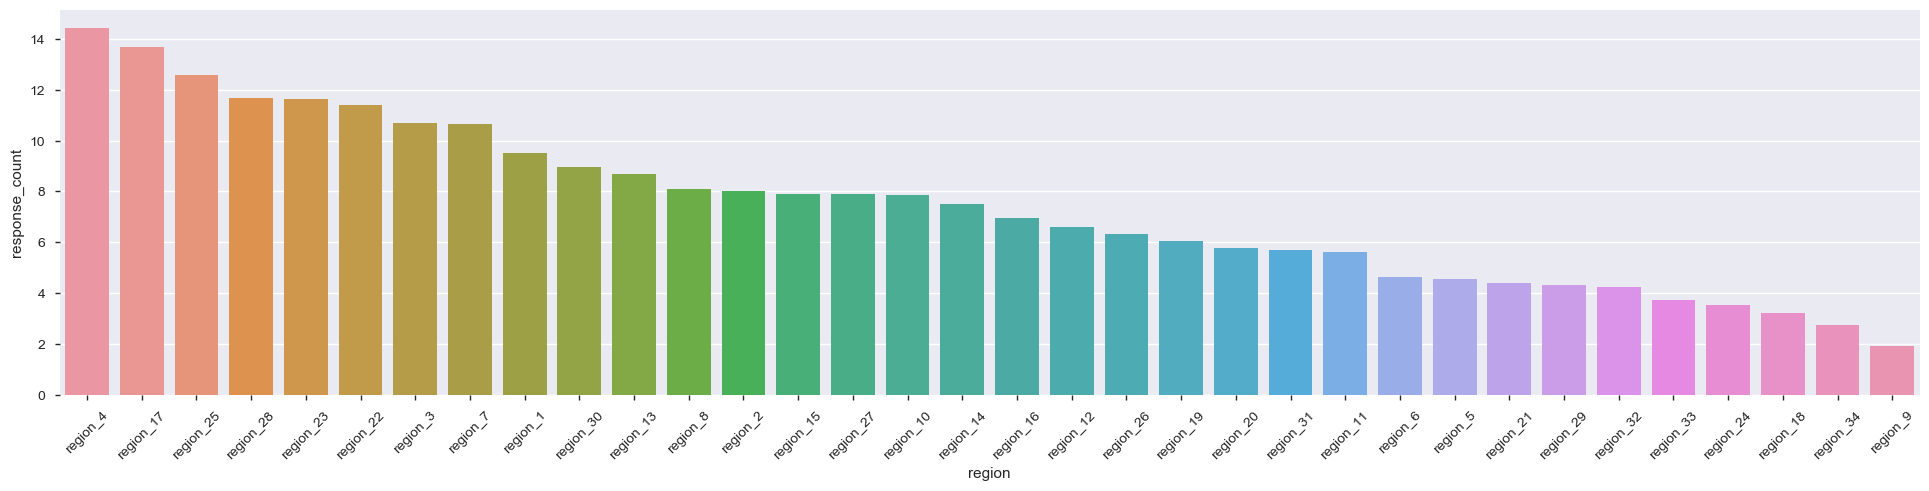

In [58]:
plt.figure(figsize=(24,5))
ax = sns.barplot(x="region", y="response_count", data=research_df1)
plt.xticks(rotation=45)
plt.show()